#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [ ]:
import wandb
wandb.login(key="da1e0ef6ffadb737c9b7e2c8b1935eb43ae190ee")
wandb.init(project='distance_classification', name="experiment_1")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /Users/owlxshri/.netrc
wandb: Currently logged in as: shrijakcked (shrijakcked-shrijak) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

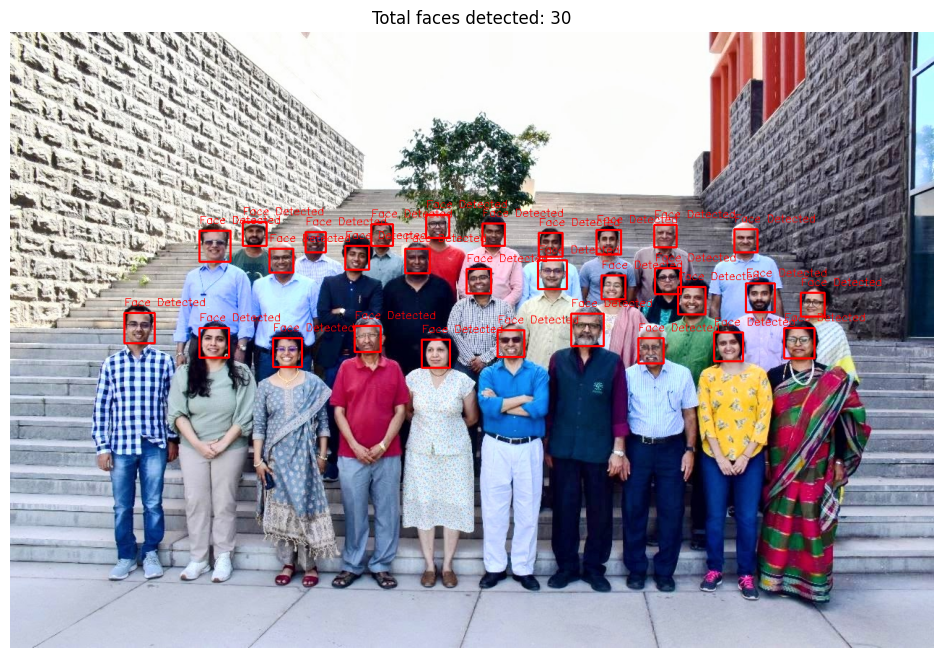

Total faces detected: 30


In [ ]:

from IPython.display import display

# Read the image
img = cv2.imread("plakshaFaculty.jpg")

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load Haar cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Detect faces
faces_rect = face_cascade.detectMultiScale(gray_img, scaleFactor=1.05, minNeighbors=4, minSize=(25, 25), maxSize=(50, 50))

# Draw rectangles around detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.putText(img, "Face Detected", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# Convert BGR to RGB for matplotlib display
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(rgb_img)
plt.title(f"Total faces detected: {len(faces_rect)}")
plt.axis('off')
plt.show()

print(f"Total faces detected: {len(faces_rect)}")

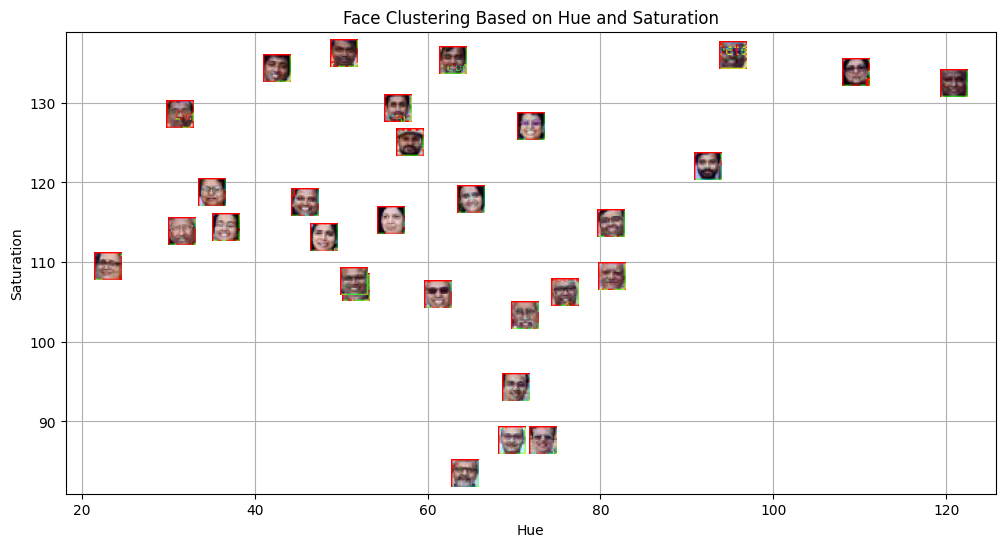

In [ ]:

from sklearn.cluster import KMeans

# Convert the image from BGR to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])  # Extract mean hue
    saturation = np.mean(face[:, :, 1])  # Extract mean saturation
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

# Perform k-Means clustering on hue_saturation
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(hue_saturation)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x, y, w, h) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'bo')  # Blue marker for each face

# Add labels, title, and grid
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clustering Based on Hue and Saturation")
plt.grid(True)

# Show the plot
plt.show()


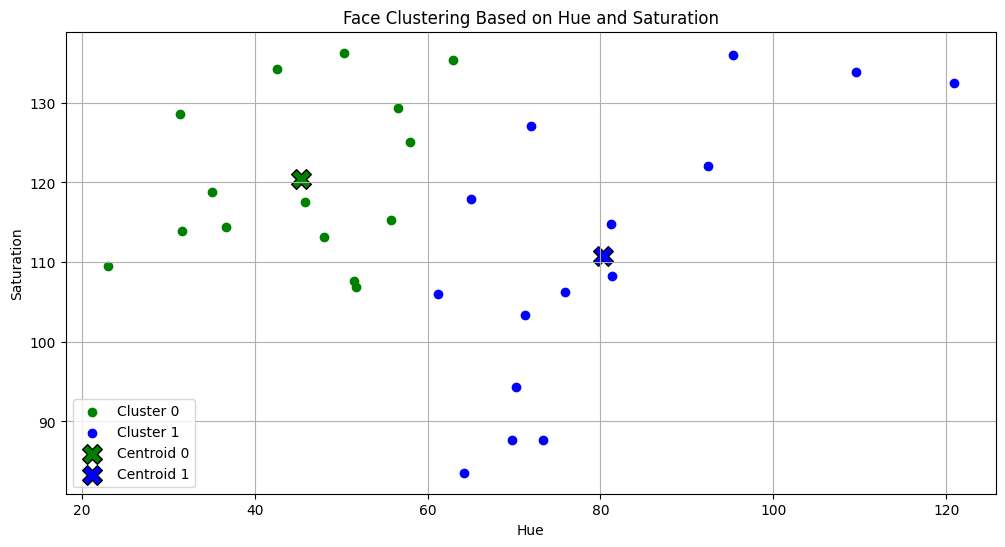

In [3]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c='green', marker='X', s=200, edgecolors='black', label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], c='blue', marker='X', s=200, edgecolors='black', label='Centroid 1')

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Face Clustering Based on Hue and Saturation')
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## Show the plot
plt.show()

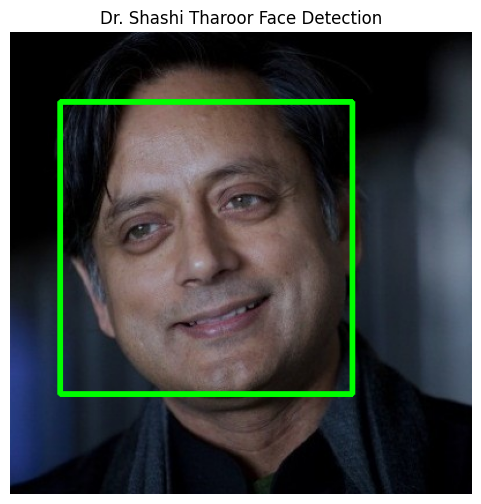

In [2]:
# Read the template image
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')

# Convert the image to grayscale
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

# Load Haar cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Detect faces in the template image
template_faces = face_cascade.detectMultiScale(template_gray, scaleFactor=1.05, minNeighbors=4, minSize=(25, 25))

# Draw rectangles around detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)  # Green rectangle

# Convert BGR to RGB for correct display in Matplotlib
template_img_rgb = cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB)

# Display the image in Jupyter Notebook
plt.figure(figsize=(6,6))  # Set figure size
plt.imshow(template_img_rgb)  # Show the image
plt.axis("off")  # Hide axis
plt.title("Dr. Shashi Tharoor Face Detection")
plt.show()


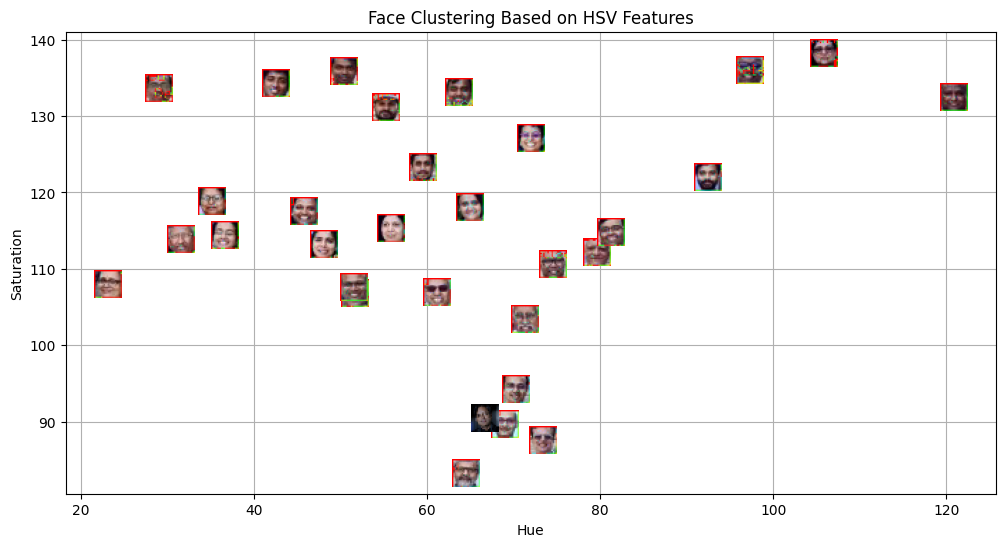

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

# Put x label
plt.xlabel("Hue")

# Put y label
plt.ylabel("Saturation")

# Put title
plt.title("Face Clustering Based on HSV Features")

# Add grid
plt.grid(True)

# Show plot
plt.show()


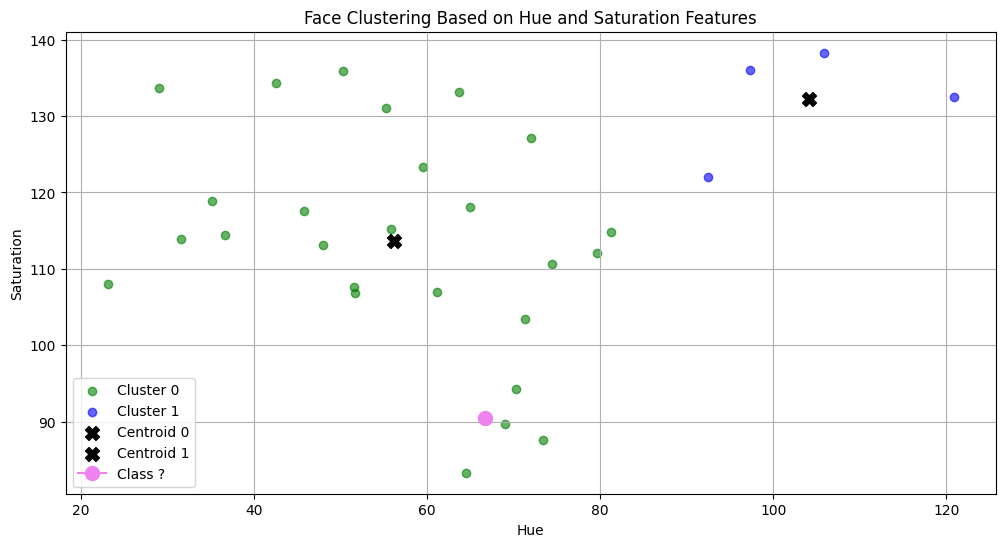

In [9]:

# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label="Cluster 0", alpha=0.6)

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label="Cluster 1", alpha=0.6)

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1], c='black', marker='X', s=100, label="Centroid 0")  # plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='black', marker='X', s=100, label="Centroid 1")  # plot for centroid 1

# Plot the template image point in violet
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Class ?')

# Put x label
plt.xlabel("Hue")

# Put y label
plt.ylabel("Saturation")

# Put title
plt.title("Face Clustering Based on Hue and Saturation Features")

# Add a legend
plt.legend()

# Add grid
plt.grid(True)

# Show the plot
plt.show()

# End of the lab 5


## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 

# Distance-Based Classification Algorithms

## 1. Common Distance Metrics  
- **Euclidean Distance**: Measures the straight-line distance between two points.  
- **Manhattan Distance**: Computes the sum of absolute differences along each dimension.  
- **Minkowski Distance**: A generalized form that includes both Euclidean and Manhattan distances.  
- **Cosine Similarity**: Measures the angle between two vectors, often used for text data.  
- **Mahalanobis Distance**: Accounts for correlations between features and scales the distances accordingly.  

## 2. Real-World Applications  
- **Recommendation Systems**: Used in movie, music, and product recommendations.  
- **Medical Diagnosis**: Helps classify diseases based on patient symptoms.  
- **Anomaly Detection**: Identifies fraud in banking and network security.  
- **Image Recognition**: Used in face and object recognition.  
- **Handwriting and Speech Recognition**: Helps in digit classification and voice-based applications.  

## 3. Various Distance Metrics  
- **Euclidean Distance**: Measures direct distance between two points.  
- **Manhattan Distance**: Calculates the sum of absolute differences.  
- **Minkowski Distance**: A flexible metric that generalizes multiple distance calculations.  
- **Cosine Similarity**: Determines similarity based on the orientation of vectors.  
- **Mahalanobis Distance**: Adjusts for feature correlations to improve accuracy.  

## 4. Role of Cross-Validation  
- Helps in preventing **overfitting** by validating the model on unseen data.  
- Assists in **hyperparameter tuning**, such as selecting the optimal number of neighbors in KNN.  
- Ensures **generalization** by evaluating performance across multiple subsets of the dataset.  

## 5. Variance and Bias in KNN  
- **Low K (small neighbors)** results in **high variance and low bias**, meaning the model captures noise and overfits.  
- **High K (large neighbors)** leads to **low variance and high bias**, making the model too generalized and prone to underfitting.  
- The **optimal K** is chosen to balance bias and variance, improving overall performance.  
